In [36]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [37]:
ardilla = cv.imread(r"c:\Users\Ale Escallada\OneDrive\Documentos\imagenesPI\squirrel_cls.jpg")[:, :, :: -1]

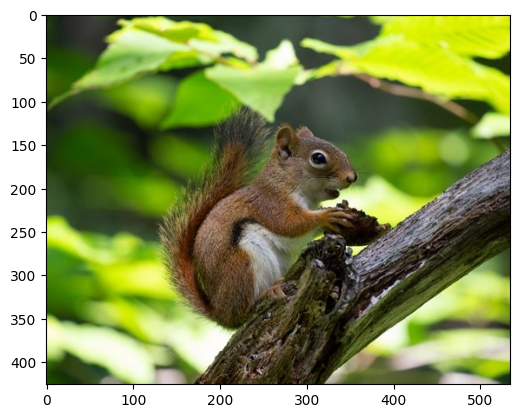

In [38]:
plt.imshow(ardilla)

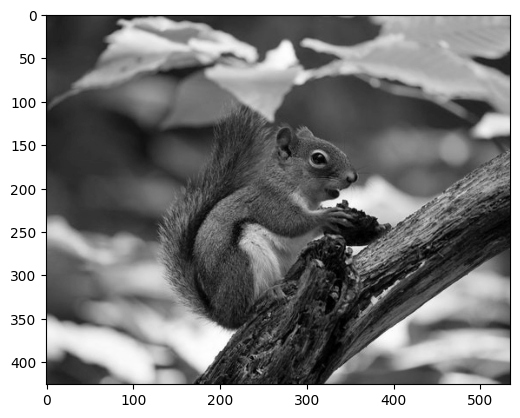

In [39]:
ardilla_gris = cv.cvtColor(ardilla, cv.COLOR_BGR2GRAY)
plt.imshow(ardilla_gris, "gray")

In [40]:
filas, columnas = ardilla_gris.shape

## Umbralización

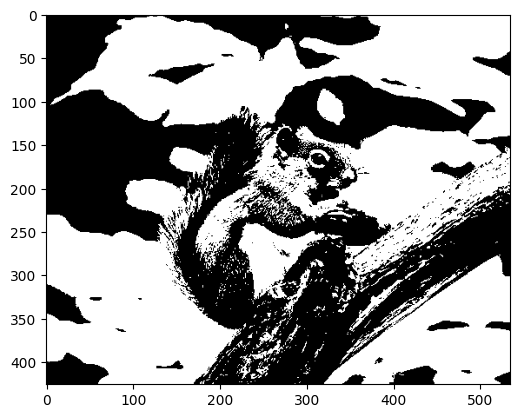

In [41]:
ardilla_bin = cv.threshold(ardilla_gris, 80, 255, cv.THRESH_BINARY)[1]
plt.imshow(ardilla_bin, "gray")

In [42]:
plt.imsave("ardillaBin.jpg", ardilla_bin, cmap="gray")

## Transformación negativa

In [43]:
img_resN = ardilla_gris.copy()

for f in range(filas):
    for c in range(columnas):
        img_resN[f, c] = 255 - ardilla_gris[f, c]

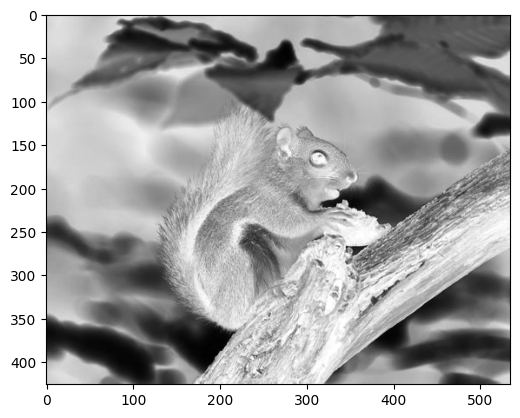

In [44]:
plt.imshow(img_resN, "gray")

## Transformacion logarítmica

In [45]:
m = np.max(ardilla_gris)

In [46]:
c = 255/np.log(1 + m)

In [47]:
img_res = ardilla_gris.copy()

for f in range(filas):
    for c in range(columnas):
        img_res[f, c] = c * np.log(1 + ardilla_gris[f, c])

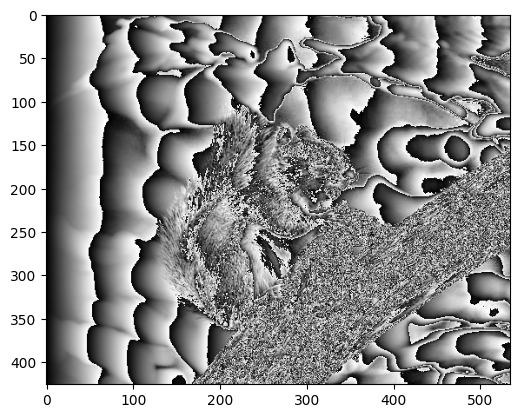

In [48]:
plt.imshow(img_res, "gray")

## Gamma

In [49]:
#Imagen original
ardilla_gris

array([[ 40,  39,  39, ..., 148, 126,  98],
       [ 40,  39,  39, ..., 166, 152, 131],
       [ 41,  40,  39, ..., 172, 169, 156],
       ...,
       [ 50,  50,  49, ...,  39,  39,  39],
       [ 50,  50,  50, ...,  42,  41,  41],
       [ 50,  50,  50, ...,  44,  42,  42]], dtype=uint8)

### Recorriendo pixel por pixel

In [50]:
for f in range(filas):
    for c in range(columnas):
        img_res[f,c] = ardilla_gris[f, c]**(1.5)

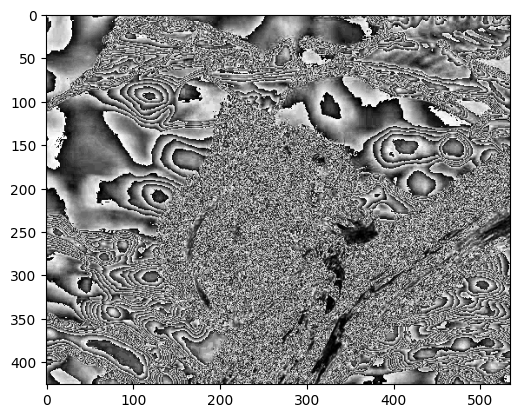

In [51]:
plt.imshow(img_res, "gray")

In [52]:
plt.imsave("ardillaLog.jpg", img_res, cmap="gray")

In [53]:
#Potencia (2^5)
np.power(2, 5)

32

In [54]:
np.power(ardilla_gris.astype(np.float32), 5), "gray"

(array([[1.02400000e+08, 9.02242000e+07, 9.02242000e+07, ...,
         7.10082150e+10, 3.17579694e+10, 9.03920845e+09],
        [1.02400000e+08, 9.02242000e+07, 9.02242000e+07, ...,
         1.26049305e+11, 8.11368120e+10, 3.85794908e+10],
        [1.15856200e+08, 1.02400000e+08, 9.02242000e+07, ...,
         1.50536651e+11, 1.37858499e+11, 9.23895808e+10],
        ...,
        [3.12500000e+08, 3.12500000e+08, 2.82475264e+08, ...,
         9.02242000e+07, 9.02242000e+07, 9.02242000e+07],
        [3.12500000e+08, 3.12500000e+08, 3.12500000e+08, ...,
         1.30691232e+08, 1.15856200e+08, 1.15856200e+08],
        [3.12500000e+08, 3.12500000e+08, 3.12500000e+08, ...,
         1.64916224e+08, 1.30691232e+08, 1.30691232e+08]], dtype=float32),
 'gray')

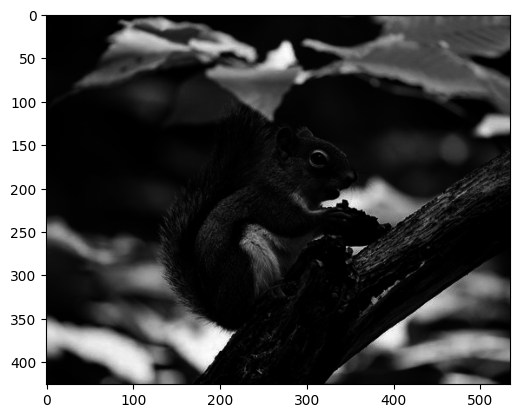

In [74]:
ardilla_gamma = np.power(ardilla_gris.astype(np.float32), 3)
plt.imshow(ardilla_gamma , "gray")


In [75]:
plt.imsave("ardillaGam.jpg", ardilla_gamma, cmap="gray")

# Repaso

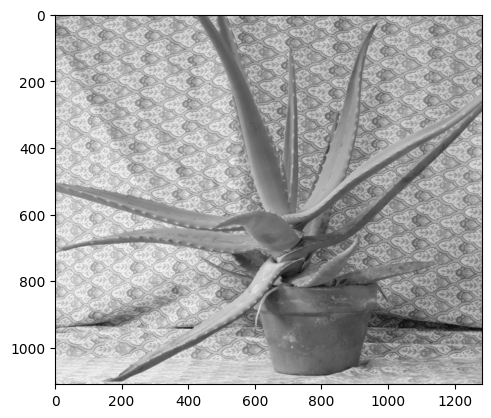

In [56]:
planta = cv.imread(r"c:\Users\Ale Escallada\OneDrive\Documentos\imagenesPI\aloeR.jpg", 0)
plt.imshow(planta, "gray")

In [57]:
filas, columnas = planta.shape

In [58]:
planta_res = planta.copy()

### Transformación negativa

In [59]:
for f in range(filas):
    for c in range(columnas):
        planta_res[f,c] = 255 - planta[f,c]

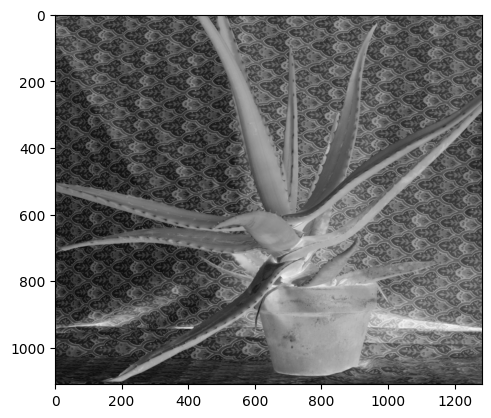

In [60]:
plt.imshow(planta_res, "gray")

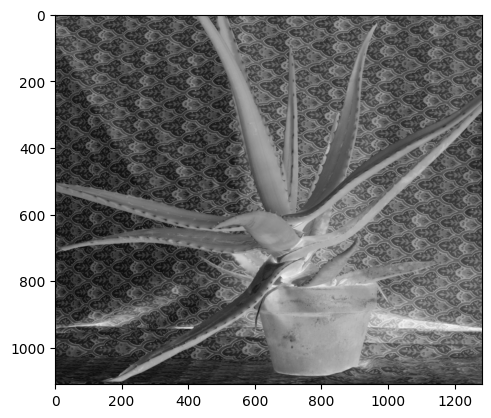

In [61]:
plt.imshow(255-planta, "gray")

### Transformación logarítmica

In [62]:
m = np.max(planta)
m

255

In [63]:
c = 255 / (np.log(1 + m))
#255 / (np.log(1 + m))
c

45.98590442833571

In [64]:

for f in range(filas):
    for col in range(columnas):
        planta_res[f, col] = c * np.log(1 + planta[f, col])

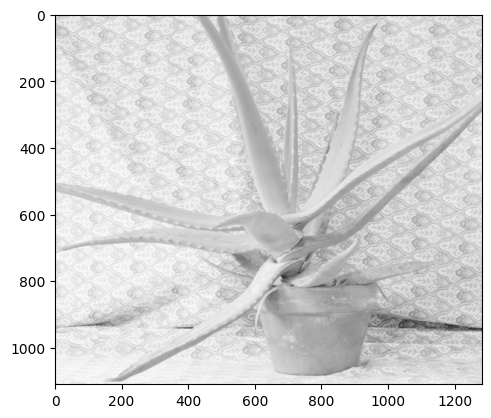

In [65]:
plt.imshow(planta_res, cmap="gray")

### Transformaciones Gamma

In [66]:
for f in range(filas):
    for c in range(columnas):
        planta_res[f,c] = planta[f,c]**1.1

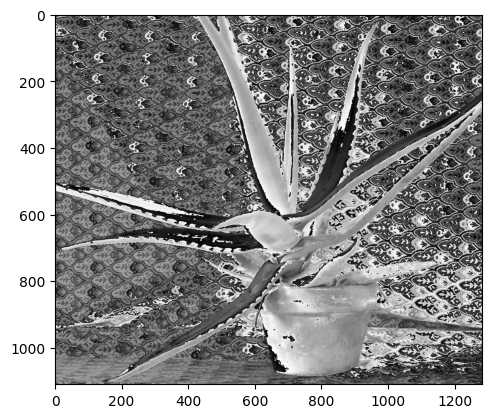

In [67]:
plt.imshow(planta_res, "gray")

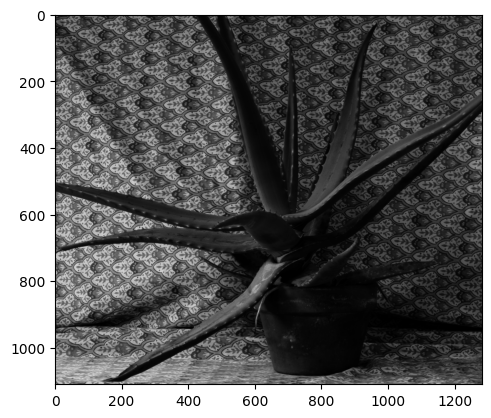

In [68]:
plt.imshow(np.power(planta.astype(np.float32), 4), "gray")

### Umbralización

In [69]:
k = 200

for f in range(filas):
    for c in range(columnas):
        if (planta[f,c] > k):
            planta_res[f,c] = 255
        else:
            planta_res[f,c] = 0



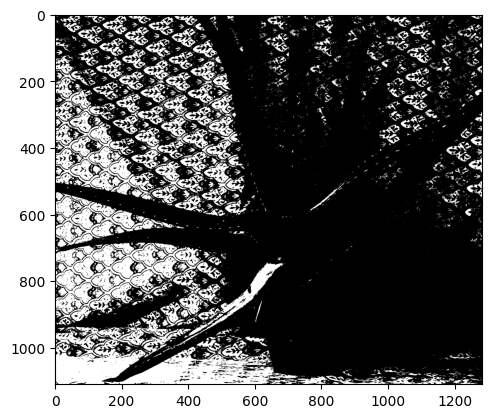

In [70]:
plt.imshow(planta_res, "gray")

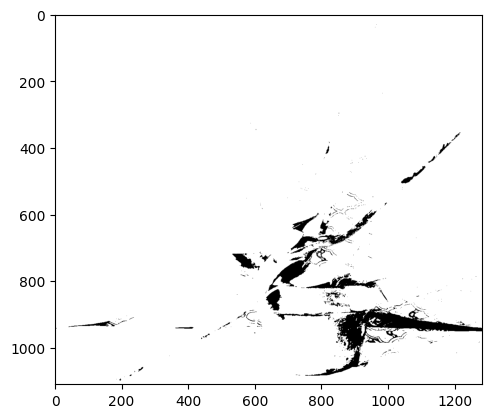

In [71]:
im_bin = cv.threshold(planta, 90, 255, cv.THRESH_BINARY)[1]
plt.imshow(im_bin, "gray")